画像解析

画像の表示

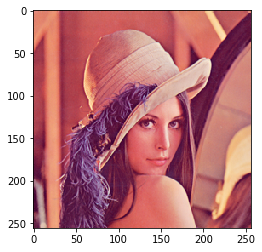

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import cv2


#画像(shimarisu.jpg)の読み込み
img = cv2.imread("/Users/0408h/Desktop/color/Lenna.bmp")

#画像の表示
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # OpenCV は色がGBR順なのでRGB順に並べ替える
plt.show()

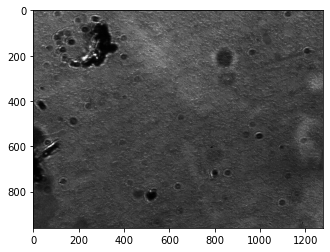

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import cv2


#画像(shimarisu.jpg)の読み込み
img = cv2.imread("C:/Users/wadat/Pictures/garnet 5.bmp")

#画像の表示
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # OpenCV は色がGBR順なのでRGB順に並べ替える
plt.show()

 Gray scale 3D Surface plot (from image)

[[109  98 105 ...  94  92  91]
 [106 102  98 ...  91  92  97]
 [104 104  99 ...  90  94  91]
 ...
 [115 120 110 ... 101 106 106]
 [120 120 121 ... 102 111 104]
 [113 120 113 ... 106 102 103]]


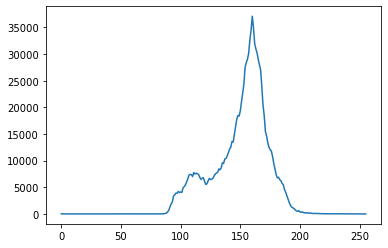

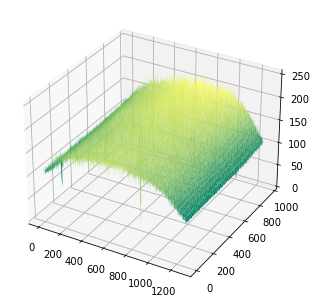

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 画像の読み込み、ヒストグラム
img = cv2.imread('C:/Users/wadat/Python/picture/siro.jpg',0)
histr = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histr)

# 画像の配列への変換
import PIL.Image
im = np.array(img)
print(im)

# 3Dプロットする際のグラフの規格指定
from mpl_toolkits.mplot3d import Axes3D
x = np.arange(len(im[0]))
y = np.arange(len(im))
X, Y = np.meshgrid(x, y)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, np.array(im), cmap = "summer")

 Gray scale 3D Surface plot (from txt)

[[109  98 105 ...  94  92  91]
 [106 102  98 ...  91  92  97]
 [104 104  99 ...  90  94  91]
 ...
 [115 120 110 ... 101 106 106]
 [120 120 121 ... 102 111 104]
 [113 120 113 ... 106 102 103]]


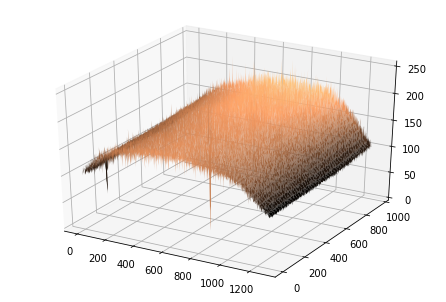

In [7]:
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

img = pd.read_csv('C:/Users/0408h/Documents/Python Scripts/siro.txt',sep='\t',header=None)
im = np.array(img)

print(im)

x = np.arange(len(im[0]))
y = np.arange(len(im))
X, Y = np.meshgrid(x, y)

fig = plt.figure()

ax = Axes3D(fig)

ax.plot_surface(X, Y, np.array(im), cmap = "copper")

輝度ムラ(減算),3D plot & 2D plot

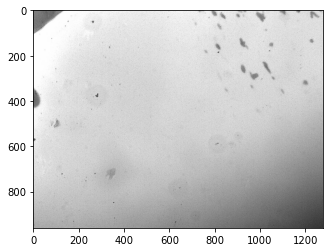

[[133 136 124 ... 194 201 206]
 [142 140 125 ... 201 196 208]
 [140 140 125 ... 184 207 214]
 ...
 [186 167 151 ...  61  52  49]
 [161 176 183 ...  60  61  55]
 [168 176 167 ...  56  48  58]]


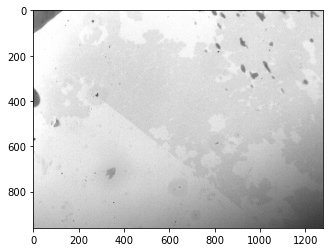

[[133 133 119 ... 222 218 227]
 [142 127 143 ... 208 205 224]
 [140 125 109 ... 209 231 235]
 ...
 [201 181 164 ...  52  56  52]
 [190 184 181 ...  52  56  56]
 [184 183 190 ...  58  48  56]]
[[  0   3   5 ... 228 239 235]
 [  0  13 238 ... 249 247 240]
 [  0  15  16 ... 231 232 235]
 ...
 [241 242 243 ...   9 252 253]
 [227 248   2 ...   8   5 255]
 [240 249 233 ... 254   0   2]]


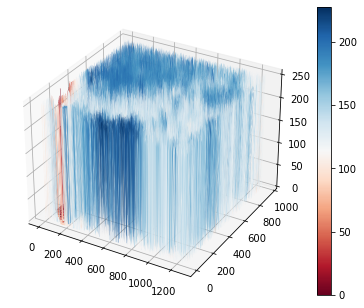

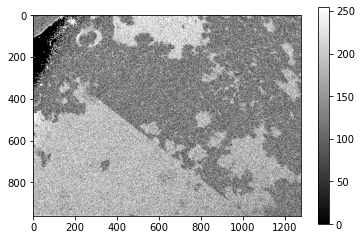

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import PIL.Image

img1 = cv2.imread("68416b.bmp",0)
img2 = cv2.imread('68416.bmp',0)

plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)) 
plt.show()
im1 = np.array(img1)
print(im1)

plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()
im2 = np.array(img2)
print(im2)


im3 = im1 - im2
print(im3)


from mpl_toolkits.mplot3d import Axes3D
x = np.arange(len(im3[0]))
y = np.arange(len(im3))
X, Y = np.meshgrid(x, y)
fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_surface(X, Y, np.array(im3), cmap = "RdBu")
fig.colorbar(surf)


from mpl_toolkits.mplot3d import Axes3D
x = np.arange(len(im3[0]))
y = np.arange(len(im3))
X, Y = np.meshgrid(x, y)
fig = plt.figure()
abc = plt.imshow(im3, cmap = "gray")
fig.colorbar(abc)

指定範囲内のヒストグラム表示

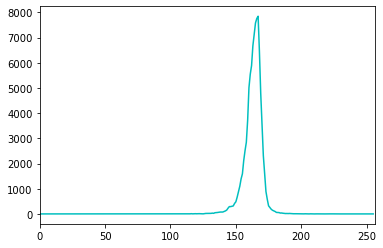

In [4]:
import sys
import numpy as np
import cv2
from matplotlib import pyplot as plt


# グローーバル変数
drawing = False
complete_region = False
ix,iy,width,height = -1,-1,0,0
box = [ix, iy, width, height]


# マウスコールバック関数
def my_mouse_callback(event,x,y,flags,param):
    global ix,iy,width,height,box,drawing,complete_region

    if event == cv2.EVENT_MOUSEMOVE:      # マウスが動いた時
        if(drawing == True):
            width = x - ix
            height = y - iy

    elif event == cv2.EVENT_LBUTTONDOWN:  # マウス左押された時
        drawing = True

        ix = x
        iy = y
        width = 0
        height = 0

    elif event == cv2.EVENT_LBUTTONUP:    # マウス左離された時
        drawing = False
        complete_region = True

        if(width < 0):
            ix += width
            width *= -1
        if(height < 0):
           iy += height
           height *= -1

    box = [ix, iy, width, height]         # 切り取り範囲格納




# メイン関数
def main():
    global ix,iy,width,height,box,drawing,complete_region

    source_window = "draw_rectangle"
    roi_window = "region_of_image"

    img = cv2.imread("siro.jpg",1)  # 画像の読み込み
    temp = img.copy()                # 画像コピー

    cv2.namedWindow(source_window)
    cv2.setMouseCallback(source_window, my_mouse_callback)

    while(1):
        cv2.imshow(source_window,temp)

        if(drawing):             # 左クリック押されてたら
            temp = img.copy()    # 画像コピー
            cv2.rectangle(temp,(ix,iy),(ix + width, iy+ height),(0,255,0),2)  # 矩形を描画

        if(complete_region): # 矩形の選択が終了したら
            complete_region = False

            roi = img[iy:iy+height, ix:ix+width] # 元画像から選択範囲を切り取り
            cv2.imshow(roi_window, roi)          # 切り取り画像表示

            # ヒストグラム作成
            color = ('c')
            for i,col in enumerate(color):
                histr = cv2.calcHist([roi],[i],None,[256],[0,256])
                plt.plot(histr,color = col)
                plt.xlim([0,256])
            plt.show(block=False)

        # キー操作
        k = cv2.waitKey(1) & 0xFF
        if k == 27:          # esc押されたら終了
            break
        elif k ==ord('s'):   # 's'押されたら画像を保存
            cv2.imwrite('roi.png', roi)
            cv2.imwrite('draw_src.png', temp)
            plt.savefig('histgram.png')

    cv2.destroyAllWindows()



if __name__ == "__main__":
    main()

Line profile

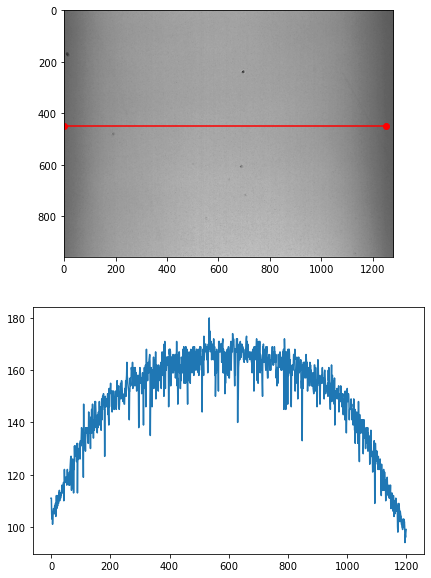

In [5]:
import cv2
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
from PIL import Image
from pylab import *
#-- Generate some data...
x, y = np.mgrid[-5:5:0.1, -5:5:0.1]
img1 = cv2.imread("siro.jpg",0)

#-- Extract the line...
# Make a line with "num" points...
x0, y0 = 0, 450 # These are in _pixel_ coordinates!!
x1, y1 = 1250, 450
num = 1200
x, y = np.linspace(y0, y1, num), np.linspace(x0, x1, num)

# Extract the values along the line, using cubic interpolation
zi = scipy.ndimage.map_coordinates(img1, np.vstack((x,y)))

#-- Plot...
fig, axes = plt.subplots(figsize=(7,10),nrows=2)
axes[0].imshow(img1, cmap='gray')
axes[0].plot([x0, x1], [y0, y1], 'ro-')
axes[0].axis('image')

axes[1].plot(zi)

plt.show()

Line profile (複数)

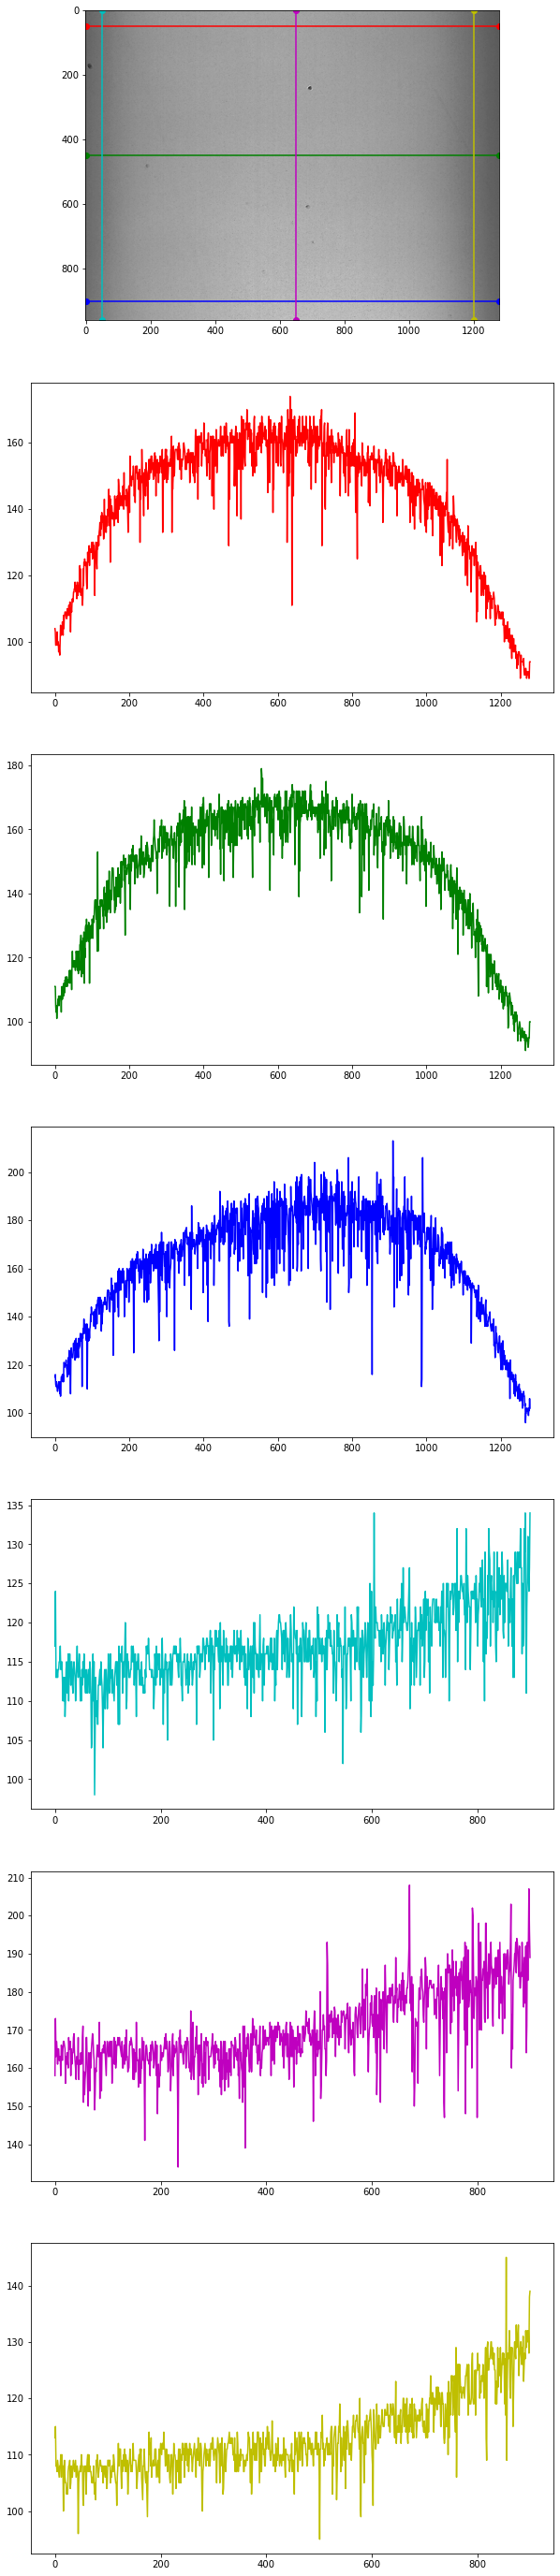

In [6]:
import cv2
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
from PIL import Image
from pylab import *
#-- Generate some data...
x, y = np.mgrid[-5:5:0.1, -5:5:0.1]
img1 = cv2.imread("siro.jpg",0)

#-- Extract the line...
# Make a line with "num" points...
x0, y0 = 0, 50 # These are in _pixel_ coordinates!!
x1, y1 = 1279, 50
num = 1280
x, y = np.linspace(y0, y1, num), np.linspace(x0, x1, num)
za = scipy.ndimage.map_coordinates(img1, np.vstack((x,y)))


x2, y2 = 0, 450
x3, y3 = 1279, 450
num = 1280
x, y = np.linspace(y2, y3, num), np.linspace(x2, x3, num)
zb = scipy.ndimage.map_coordinates(img1, np.vstack((x,y)))


x4, y4 = 0, 900
x5, y5 = 1279, 900
num = 1280
x, y = np.linspace(y4, y5, num), np.linspace(x4, x5, num)
zc = scipy.ndimage.map_coordinates(img1, np.vstack((x,y)))


x6, y6 = 50, 0
x7, y7 = 50, 959
num = 900
x, y = np.linspace(y6, y7, num), np.linspace(x6, x7, num)
zd = scipy.ndimage.map_coordinates(img1, np.vstack((x,y)))


x8, y8 = 650, 0
x9, y9 = 650, 959
num = 900
x, y = np.linspace(y8, y9, num), np.linspace(x8, x9, num)
ze = scipy.ndimage.map_coordinates(img1, np.vstack((x,y)))


x10, y10 = 1200, 0
x11, y11 = 1200, 959
num = 900
x, y = np.linspace(y10, y11, num), np.linspace(x10, x11, num)
zf = scipy.ndimage.map_coordinates(img1, np.vstack((x,y)))


#-- Plot...
fig, axes = plt.subplots(figsize=(10,50),nrows=7)
axes[0].imshow(img1, cmap='gray')
axes[0].plot([x0, x1], [y0, y1], 'ro-')
axes[0].plot([x2, x3], [y2, y3], 'go-')
axes[0].plot([x4, x5], [y4, y5], 'bo-')
axes[0].plot([x6, x7], [y6, y7], 'co-')
axes[0].plot([x8, x9], [y8, y9], 'mo-')
axes[0].plot([x10, x11], [y10, y11], 'yo-')
axes[0].axis('image')

axes[1].plot(za,color = "r")
axes[2].plot(zb,color = "g")
axes[3].plot(zc,color = "b")
axes[4].plot(zd,color = "c")
axes[5].plot(ze,color = "m")
axes[6].plot(zf,color = "y")

plt.show()

磁区のGray scale (引き算)

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D


img = cv2.imread('siro.jpg',0) #siro
img2 = cv2.imread('siro.jpg',0) #kuro
test = cv2.imread('test.bmp',0) #gdfeco
kernel = np.ones((15,15),np.float32)/225
dst = cv2.filter2D(img,-1,kernel) #siroMOZAIKU
est = cv2.filter2D(img2,-1,kernel) #kuroMOZAIKU


im = np.array(img) #siro
im2 = np.array(dst) #siro MOZAIKU
im3 = np.array(est) #kuro MOZAIKU
im4 = np.array(test) #gdfeco

x1 = np.arange(len(im2[0]))
y1 = np.arange(len(im2))
X, Y = np.meshgrid(x1, y1)

x2 = np.arange(len(im3[0]))
y2 = np.arange(len(im3))
X, Y = np.meshgrid(x2, y2)

x3 = np.arange(len(im4[0]))
y3 = np.arange(len(im4))
X, Y = np.meshgrid(x3, y3)

im5 = im2 - im3
im6 = im4/im5

from mpl_toolkits.mplot3d import Axes3D
x = np.arange(len(im6[0]))
y = np.arange(len(im6))

X, Y = np.meshgrid(x, y)
fig = plt.figure()
plt.plot([100,1100],[200,200],lw=5,color='#e41a1c') 
abc = plt.imshow(im6,cmap="gray")
plt.figure()

for i in range(100,1100):
    ROI = im6[200:210,i:i+1]
    x = i
    y = np.mean(ROI)
    plt.plot(x,y,marker=".",color="#0F0F0F")

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-h4wtvo23\opencv\modules\imgproc\src\filter.dispatch.cpp:1530: error: (-215:Assertion failed) !_src.empty() in function 'cv::filter2D'


フォルダ内の画像一括トリミング

In [3]:
import glob
import os

from PIL import Image

### 設定
img_dir = 'D:/顕微鏡関連/Si/TRM_Si'  # 入力ディレクトリ
out_dir = 'C:/Users/wadat/Desktop/TRM_Si'  # 出力ディレクトリ
crop_range = 550, 400, 900, 600  # 左上 x、左上y、右下x、右下y

# 指定したフォルダの画像ファイルの一覧を取得する。
types = ['*.png', '*.jpg', '*.jpeg', '*.bmp']
paths = []
for t in types:
    paths.extend(glob.glob(os.path.join(img_dir, t)))

os.makedirs(out_dir, exist_ok=True)
for p in paths:
    img = Image.open(p)  # 読み込む。
    resized = img.crop(crop_range)  # リサイズする。

    out_path = os.path.join(out_dir, os.path.basename(p))
    resized.save(out_path)
    


C:/Users/wadat/Python/picture/siro.jpg


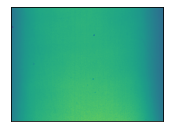

In [8]:
#置換フィールド{}に入れる文字列をformat()で指定します。
a="C:/Users/wadat/Python/picture/{}.jpg"
b="siro"
print(a.format(b))


import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(a.format(b),0)

plt.subplot(121),plt.imshow(img)
plt.xticks([]), plt.yticks([])

plt.show()

名前当てはめ

In [2]:
#置換フィールド{}に入れる文字列をformat()で指定します。
a="C:/Users/wadat/Python/picture/{}.jpg"
b="2"
print(a.format(b))


C:/Users/wadat/Python/picture/2.jpg


In [31]:
for name in [1,2,3]:
    for age in [4,5,6]:
        print("C:/Users/wadat/Python/picture/"+str(name) +"/" +str(age))

C:/Users/wadat/Python/picture/1/4
C:/Users/wadat/Python/picture/1/5
C:/Users/wadat/Python/picture/1/6
C:/Users/wadat/Python/picture/2/4
C:/Users/wadat/Python/picture/2/5
C:/Users/wadat/Python/picture/2/6
C:/Users/wadat/Python/picture/3/4
C:/Users/wadat/Python/picture/3/5
C:/Users/wadat/Python/picture/3/6


ファイル順番にグラフ化

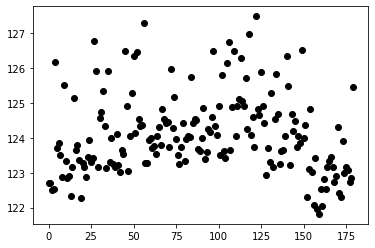

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image

a="C:/Users/wadat/Desktop/TRM_Si/{}.bmp"
for b in range(0, 180):
    img_1 = Image.open(a.format(b))
    c = np.mean (img_1)
    plt.plot(b,c,marker='o', c='black')